In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v4) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived $O-(RV/RL)-O$ Graph Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ Partitioning](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2025/09/15, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. 

The main graph datasets used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [2]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   
DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# Generic Report

The objective of this notebook is to implement a report template based on the CSR graph format used in this study,  
addressing key aspects discussed within its scope.

## Main Goals

Assuming no prior knowledge about the growing network and starting from the raw dataset, this report aims to answer the following questions:

**Report Part A**
- How are the total number of nodes and edges distributed across different node and edge types?
- What proportion of nodes and edges are affected by timestamp exceptions (i.e., those with boundary values of the supported timestamp scale)?

**Report Part B**
- How do node and edge creation events evolve over time in this growing network?
- What can we infer from the evolution of the new edges / new nodes ratio over time?
- Does it provide evidence of regime changes in the underlying growth rules?
- Do new nodes only connect to pre-existing nodes (i.e., are there edges connecting a source node to a target node that appeared after the source node)?

**Report Part C**
- How do in-degree and out-degree distributions evolve over time?
- Does the growing network exhibit signs of having reached a stationary or long-term regime in terms of in- and out-degree distributions?

This report is designed to support graphs with multiple node and edge types, and scale to networks with billions of nodes.

The template is applied to the following datasets:
- the Software Heritage (SWH) dataset,
- a synthetic dataset generated using a directed Barabási–Albert-like model,
- the APS citation network (see SM13).


## Reminder about the Default Format

The graph is represented using three arrays (`nodes`,`edges`, `nodesad`), 
a reference date (called `EPOCH`), and a dictionary `d`.  
For a graph with $N_{nodes}$ nodes and $N_{edges}$ edges:
- `nodes` is a `uint32` array of size $N_{nodes}+1$
- `edges` is a `uint32` array of size $N_{edges}$
- `nodesad` is a `uint32` array of size $N_{nodes}$

The target node indices for a given source node of index `i` are found in the slice:  
`edges[nodes[i]:nodes[i+1]]`.

Using `uint32` types allows the representation of up to $2^{32} - 1 = 4,294,967,295$ nodes and as many edges,  
which is sufficient for most real-world networks. This limit can be extended if needed by switching to larger integer types.

Timestamps are also encoded as `uint32`, allowing for $2^{32} - 1 = 4,294,967,295$ distinct timestamp values.  
By default, we assume timestamps represent the number of seconds since a reference date (`EPOCH`),  
formatted as a string in `YYYY-MM-DD` (i.e., corresponding to year `YYYY`, month `MM`, day `DD`, at 00:00:00 UTC).  
This allows encoding time intervals spanning approximately 136 years from the `EPOCH` date.

By convention, the two extreme values (0 and $2^{32} - 1$) are interpreted as follows:
- `0` includes all timestamps strictly before the reference date (`YYYY-MM-DD 00:00:00 UTC`)
- `$2^{32} - 1$` includes all timestamps strictly after `YYYY-MM-DD 00:00:00 UTC + (2^{32} - 1)` seconds,  
  i.e., roughly $(2^{32}-1)/(365 \times 24 \times 60 \times 60) \approx 136.2$ years.

The dictionary `d` contains metadata related to node types, assuming that nodes are indexed in contiguous blocks per type.  
For each node type `XXX`, the dictionary includes the following keys:
- `d["XXX"]`: the number of nodes of type `XXX`
- `d["XXXindexMin"]`: the smallest index of a node of type `XXX`
- `d["XXXindexMax"]`: the largest (inclusive) index of a node of type `XXX`

By construction, we have $d['XXX'] = d['XXXindexMax'] - d['XXXindexMin'] + 1$.

Node indices start at 0.

Edge types are derived from the source and target node types.  A directed edge connecting a source node of type `XXX` to a target node of type `YYY` is labeled with the edge type `XXX>YYY`.

To avoid redundant computations when generating the report, several temporary files are created during the execution of Part A.  
These intermediate files are stored in the directory: `exportpath/sandbox`.


## Loading Dataset

In this section, we define the parameters for one of the supported datasets:

- `TestDS = "SWH derived (O/RV/RL)-(RV/RL)"`  
  This is the main dataset studied in this work, containing over 4 billion nodes and edges.

- `TestDS = "SWH Derived O-[RV/RL]-O"`  
  A growing network derived from the previous dataset after partitioning. It includes only `Origin` nodes and contains approximately 150 million nodes and edges.

- `TestDS = "Directed BA-like"`  
  A synthetic dataset generated from a minimal directed Barabási–Albert-like growth model.

- `TestDS = "APS"`  
  The APS citation dataset (2022).

A limited set of additional parameters can be used to improve the rendering of the report,  
while keeping it as generic and reusable as possible:

- `FilterException = True` or `False` *(bool)*  
  If `True`, nodes and edges with particular timestamps (i.e., 0 or $2^{32} - 1$) are excluded from the analysis.  
  If `False`, they are included.

- `yearlongdash = [YYYY1, YYYY2, ...]` *(list of int)*  
  List of years where a vertical long dashed line should be displayed (Report Part B).

- `YearBegin = YYYY` *(int)*  
  First year from which degree histograms should be displayed (Report Part C).

- `YearEnd = YYYY` *(int)*  
  Last year up to which degree histograms should be displayed (Report Part C).

- `YearSlice = Nslice` *(int)*  
  Step size between `YearBegin` and `YearEnd` for degree histograms (Report Part C).

- `YearList = [YYYY1, YYYY2, YYYY3, 3000]` *(list of int)*  
  List of specific years at which in/out-degree histograms should be shown with a distinctive color.  
  If `3000` is included in this list, it refers to the histogram computed without timestamp filtering (i.e., the "all-times" histogram, with or without particular timestamps according to the value of `FilterException`).

In [8]:
# pick one of the following for a demo

# SWH derived network, after partitioning (~150 millions nodes/edges)
#TestDS="SWH Derived O-[RV/RL]-O"

#APS Citation network (2022à
TestDS="APS"

# Synthetic dataset  based one a directed version of the Barabasi-Albert model
#TestDS="Directed BA-like"

# Main SWH dataset studied here (~ 4 billions edges and nodes) 
# ! the largest one. Maybe not a good idea to start with this one
#TestDS="SWH derived (O/RV/RL)-(RV/RL)" 

print("Start Loading Test Dataset ",TestDS)

if TestDS=="SWH Derived O-[RV/RL]-O":
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO()  
    YearBegin=1990
    YearEnd=2020
    yearlongdash=[2021]
    YearSlice=1
    YearList=[1990,2008,2014,2019,3000]
    
elif TestDS=="APS":
    # APS Dataset
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArrayAPS()  
    YearBegin=int(EPOCH[:4])
    YearEnd=2023
    yearlongdash=[2023]
    YearSlice=5
    YearList=[1960,1980,2000,2010,3000]

elif TestDS=="Directed BA-like":
    n=int(1e6)
    m=2
    SelfLoop=False
    nodes,edges,Nnodes,Nedges,SelfLoop=BarabasiAlbertGraph(n,m,SelfLoop=SelfLoop,Verbose=True,seed=42)
    EPOCH='1900-01-01';print("EPOCH",EPOCH)
    nodesad=SetParamsBA_nodesad(Nnodes,EPOCH=EPOCH)
    d=SetParamsBA_d(Nnodes)
    YearBegin=int(EPOCH[:4])
    YearSlice=5
    YearList=[1960,1980,2000,2010,3000]
    YearEnd=2021
    yearlongdash=[2021]
elif TestDS=="SWH derived (O/RV/RL)-(RV/RL)":
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray()  
    YearBegin=1990
    YearEnd=2020
    yearlongdash=[2021]
    YearSlice=5
    YearList=[1990,2008,2014,2019]

else:
    print("UNKOWN Dataset",TestDS)
    


Start Loading Test Dataset  APS
Loaded : ./ImportData/nodes_APS_20250618.pkl
Loaded : ./ImportData/edges_APS_20250618.pkl
Loaded : ./ImportData/nodesad_APS_20250618.pkl
Loaded : ./ImportData/d_APS_20250618.pkl
DatasetName APS derived P-P
DatasetDescription From APS 2022
DatasetDoi 
From EPOCH 1900-01-01


In [9]:
# FilterException does not affect Report Part A or its temporary files.
# It can be modified before executing Report Parts B and C.
FilterException = True



## Report A : # of Nodes and Edges per type, and timestamp exceptions

In [10]:
ReportMain_A(nodes,edges,nodesad,d,EPOCH,Verbose=False)

GetNodesTypesArray [Elapse time : 0.0 (s)]
___ P     :         720,235 (100.0%)
____________________________________
___ Total :         720,235 (100.0%)

GetEdgesTypesArray [Elapse time : 0.0 (s)]
___ P>P   :       9,758,055 (100.0%)
____________________________________
___ Total :       9,758,055 (100.0%)

____________________________________________________________________________________________________________________________________________
Nodes        Timestamp Exceptions P     | Total=        720,235 | Zero(1900-01-01)=              4 | Ts(1900-01-01+2^32-1)=              0 |
____________________________________________________________________________________________________________________________________________
Source Edges Timestamp Exceptions P>P   | Total=      9,758,055 | Zero(1900-01-01)=              0 | Ts(1900-01-01+2^32-1)=              0 |
______________________________________________________________________________________________________________________________

## Report B :  New Nodes and New Edges histograms over time

Encoding of the single type of nodes ['P']
--------------------------------------------------------------------------------
Report will display the different types of nodes in the following order
[(0, 'P')]
--------------------------------------------------------------------------------
Start for nodes of type : P
--------------------------------------------------------------------------------


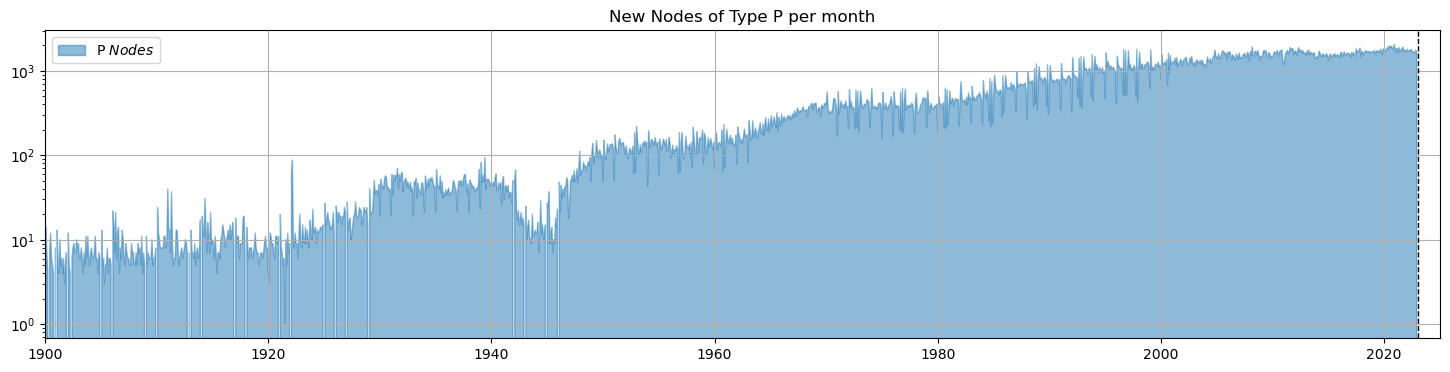

--------------------------------------------------------------------------------
Report will display the different types of edges in the following order
[(0, 'P>P')]
--------------------------------------------------------------------------------
Start for edges of type : P>P
--------------------------------------------------------------------------------


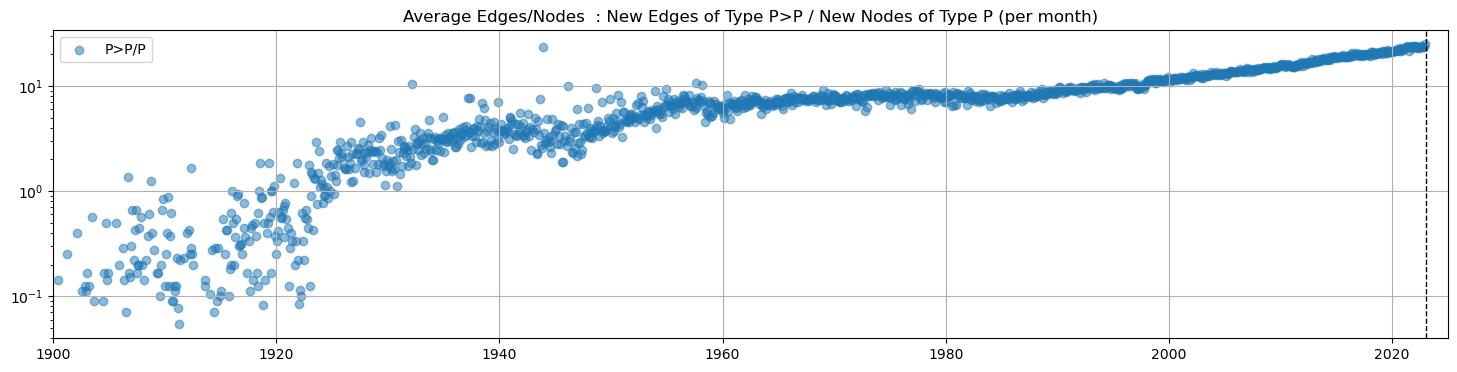

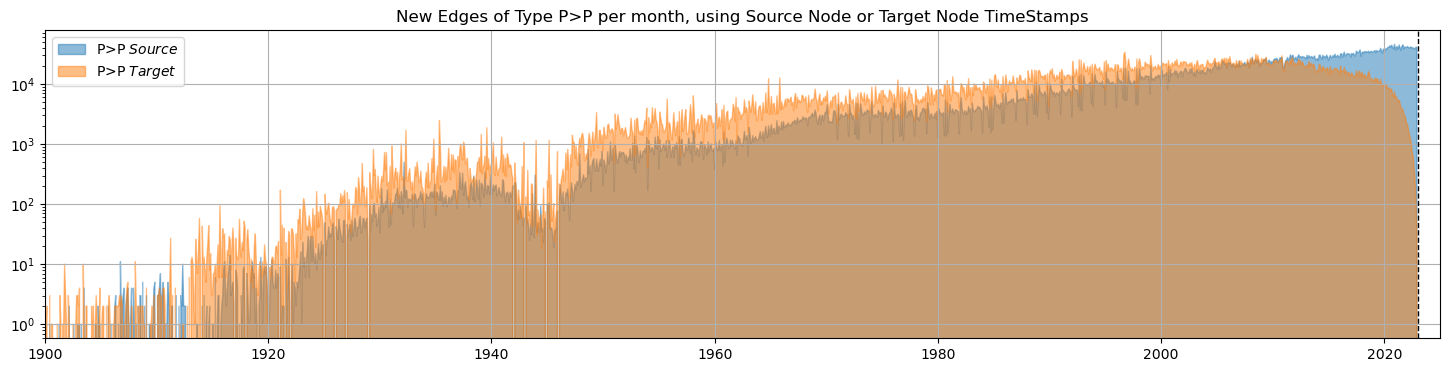

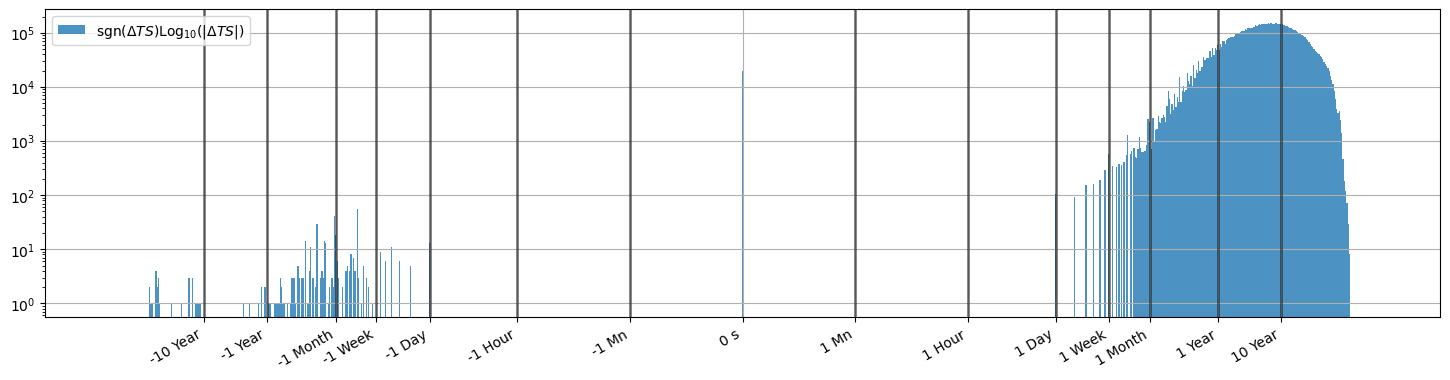

End for edge type : P>P
             TS <= -10 Years              28 i.e   0.00 %
-10 Years <  TS <= - 1 Year                7 i.e   0.00 %
- 1 Year  <  TS <= - 1 Month             190 i.e   0.00 %
- 1 Month <  TS <= - 1 Week              145 i.e   0.00 %
- 1 Week  <  TS <= - 1 Day                50 i.e   0.00 %
- 1 Day   <  TS <= - 1 Hour                0 i.e   0.00 %
- 1 Hour  <  TS <= - 1 Mn                  0 i.e   0.00 %
- 1 Mn    <  TS <= - 1 S                   0 i.e   0.00 %
................................................................................
P>P     Total TS <  0 S (negative)             420 i.e   0.00 %
................................................................................
P>P     ***** TS == 0 S (null)              19,682 i.e   0.20 %
................................................................................
P>P     Total TS >  0 S (positive)       9,737,953 i.e  99.79 %
.............................................................................

In [14]:
ReportMain_B(Nnodes,Nedges,EPOCH,yearlongdash=yearlongdash,FOnly=False,Verbose=False,FilterException=FilterException)

## Report C :  In-/Out-Degree Distributions

Start Per EDGE types 
Start type P>P / 9,758,055 edges | 1920 3000 1910 
Per edges types elapse :  0.79 (s)
Start SourceNodeType P


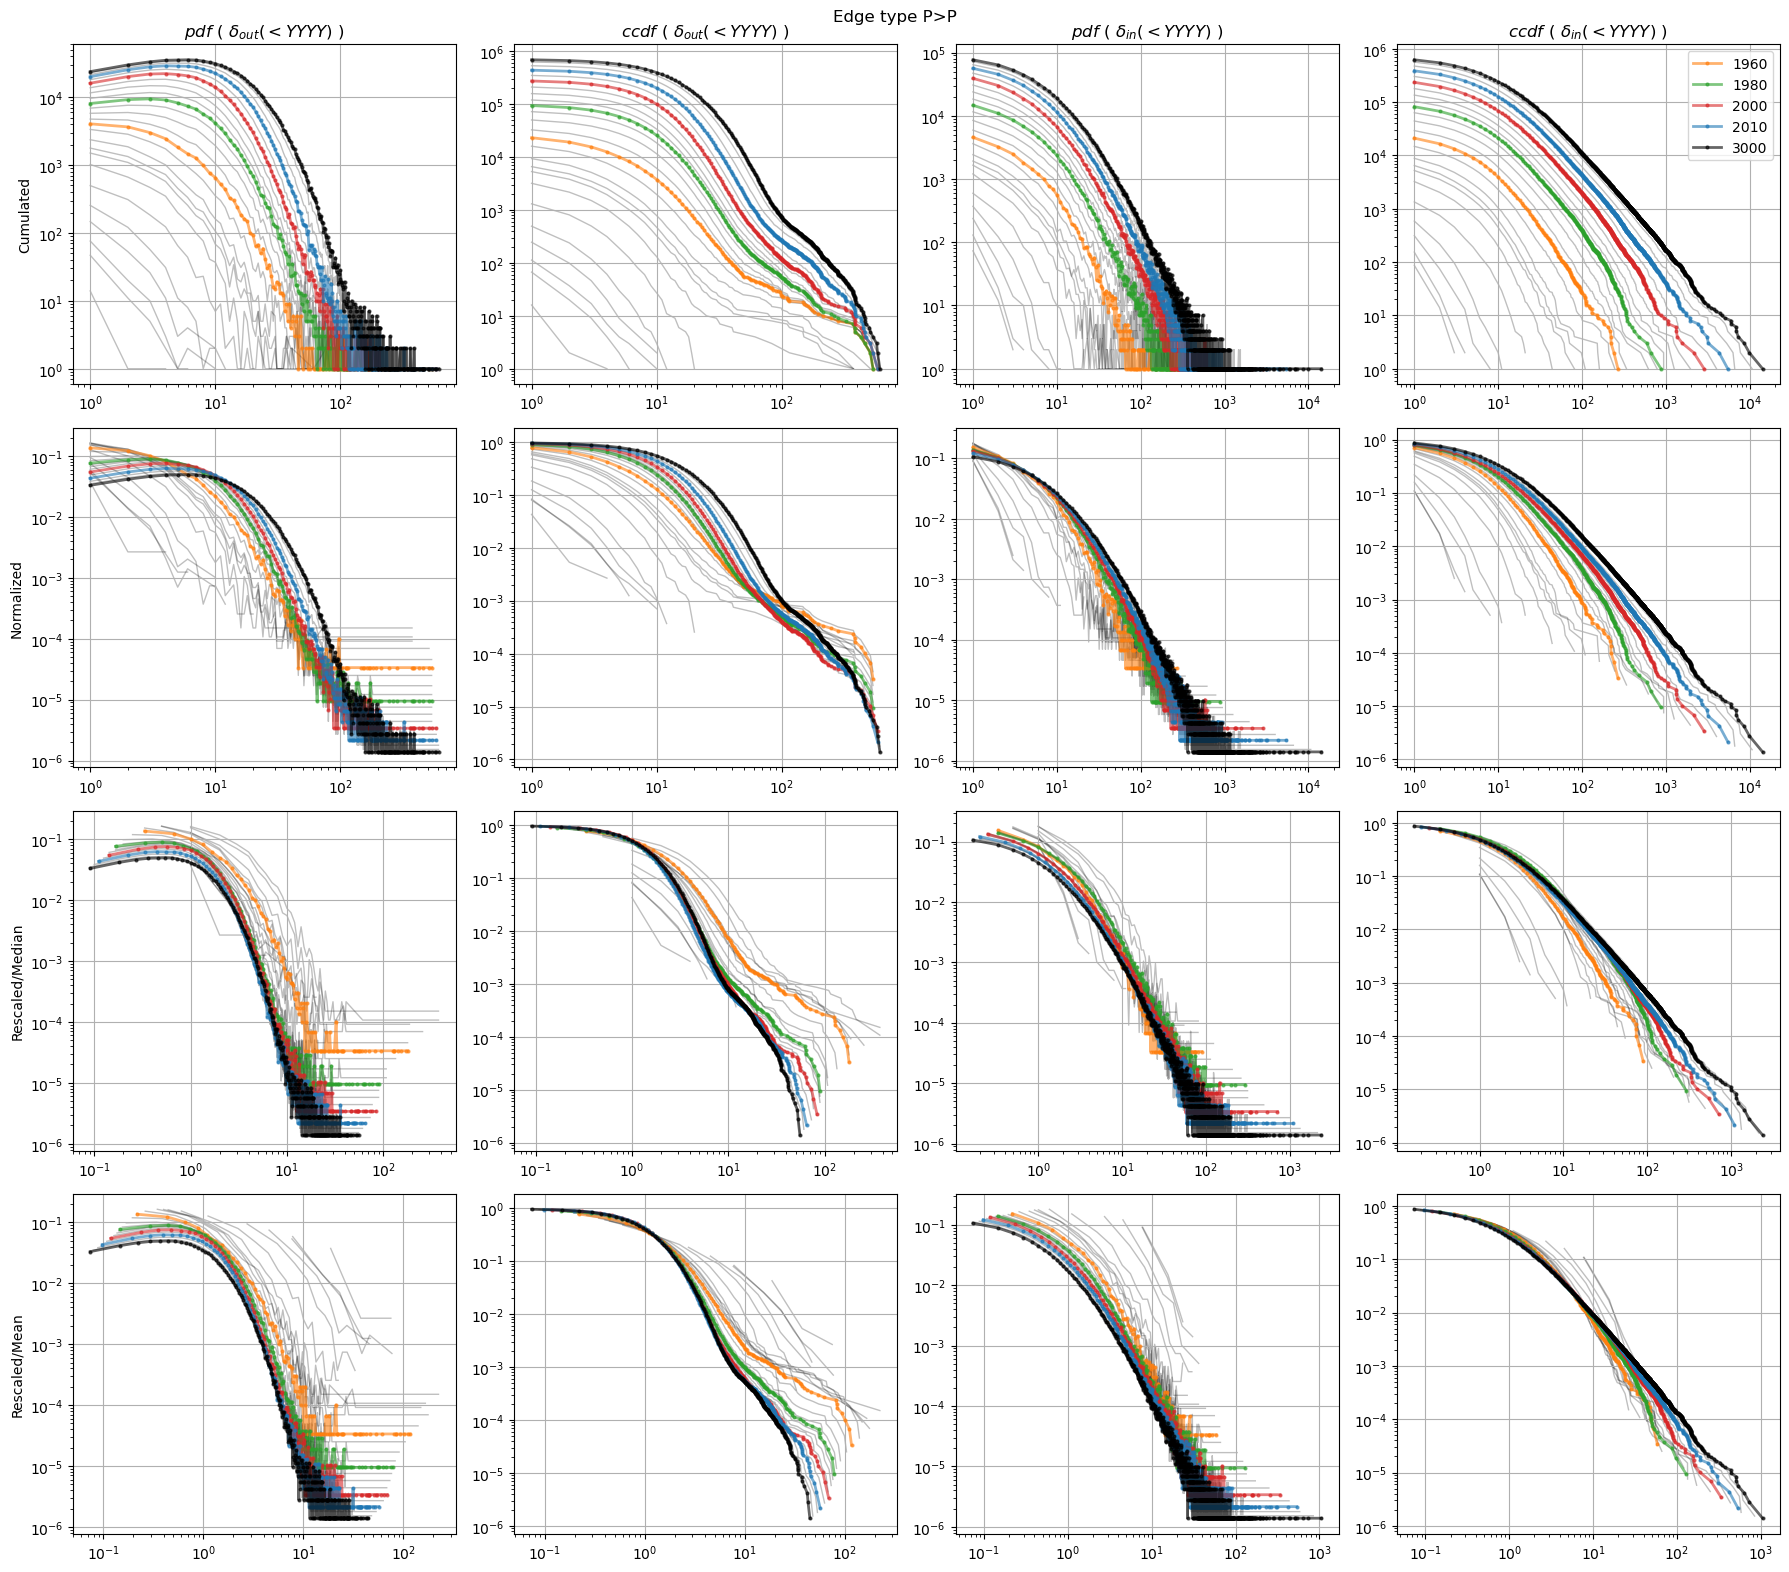

In [12]:
# loop over edge types, unless FAllTypes is True
# din and dout distributions are normalized according to Nodes(<YYYY)
# NB: din and dout distributions are accumulated over all edges with timestamps before YYY/01/01
# in this generic report, edge timestamp == source node timestamp

ReportMain_C(nodes,edges,nodesad,d,Nnodes,Nedges,
             EPOCH=EPOCH,
             YearBegin=YearBegin,
             YearEnd=YearEnd,
             YearSlice=YearSlice,
             YearList=YearList,
             FAllTypes=False,
             FilterException=FilterException
            )